# Delivery Value Analysis #

### Here we will try to find the dollar value of fast delivery, which can help us determine whether interventions will be profitable ###

Analysis Structure and Goals:
- EDA on deliveries
    - average spend by review score
    - average spend by average delivery speed
- Figure out the effects of delivery time on customer behavior
    - Reviews
    - Time till next order


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data_csv/delivery_value.csv')
df.head()


,order_id,customer_unique_id,order_purchase_timestamp,order_status,average_review_score,total_payment_value,payment_less_shipping,delivery_time,delay_time,delivery_performance,nth_order
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02,delivered,5.0,72.19,58.90,7.0,-8.0,Very Early,1
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06,delivered,4.0,259.83,239.90,16.0,-2.0,ontime,1
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31,delivered,5.0,216.87,199.00,7.0,-13.0,Very Early,1
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35,delivered,4.0,25.78,12.99,6.0,-5.0,Very Early,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51,delivered,5.0,218.04,199.90,25.0,-15.0,Very Early,1


review_score_bucket
0-1    106.620
1-2     99.925
2-3     89.900
3-4     89.900
4-5     89.990
Name: payment_less_shipping, dtype: float64


/var/folders/vc/ydqs1m4s6w35gmq4jfdzwvxw0000gn/T/ipykernel_1259/1031404626.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_spend_by_bucket = average_spend_by_review_score.groupby('review_score_bucket')['payment_less_shipping'].median()


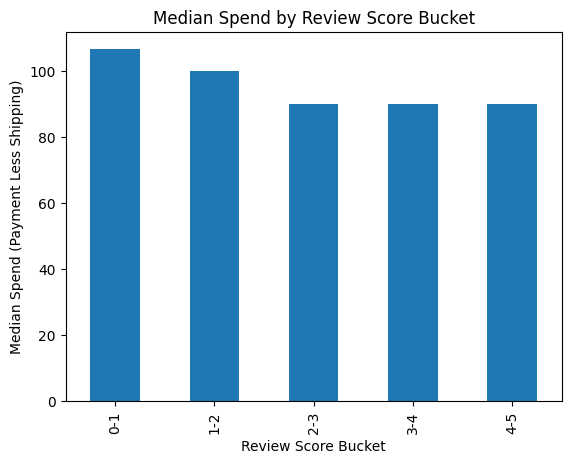

In [110]:
# Average spend by average review score
# Group by customer_unique_id, calculate the average review score and sum of payment_less_shipping
average_spend_by_review_score = df[df['average_review_score'].notnull()].groupby('customer_unique_id').agg({
    'average_review_score': 'mean',
    'payment_less_shipping': 'sum'
}).reset_index()
# Bucket the data based on average review score and calculate the median spend
average_spend_by_review_score['review_score_bucket'] = pd.cut(
    average_spend_by_review_score['average_review_score'], 
    bins=[0, 1, 2, 3 , 4, 5], 
    labels=['0-1', '1-2', '2-3','3-4','4-5']
)

median_spend_by_bucket = average_spend_by_review_score.groupby('review_score_bucket')['payment_less_shipping'].median()
print(median_spend_by_bucket)

# Plot the median spend by review score bucket
median_spend_by_bucket.plot(kind='bar')
plt.xlabel('Review Score Bucket')
plt.ylabel('Median Spend (Payment Less Shipping)')
plt.title('Median Spend by Review Score Bucket')
plt.show()

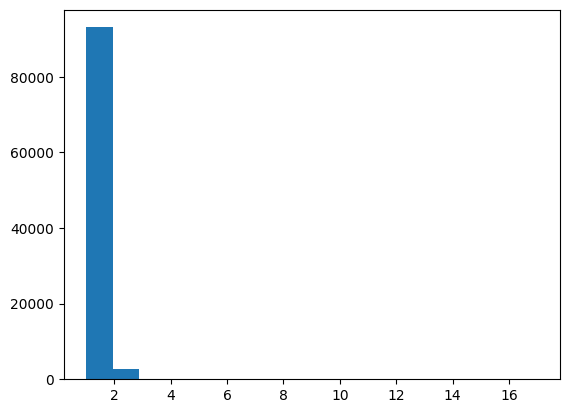

,0,percentage
order_count,,
1,93099,NaN
2,2745,0.029485
3,203,0.073953
4,30,0.147783
5,8,0.266667


In [111]:
# Get the count of orders for each unique customer ID
order_counts = df.groupby('customer_unique_id').size().reset_index(name='order_count')
plt.hist(order_counts['order_count'], bins = 17)
plt.show()
order_counts.groupby('order_count').size().head(15)
series =  order_counts.groupby('order_count').size().head(15)
with_percentage['percentage'] = series.to_frame()
with_percentage['percentage'] = with_percentage['percentage'] / with_percentage[0].shift(1)
with_percentage.head()

In [112]:
df_max_order = df.copy()
df_max_order['max_order'] = df_max_order.groupby('customer_unique_id')['nth_order'].transform('max')
second_orders = df_max_order[df_max_order['nth_order']==2]
second_orders['more_than_two'] = second_orders['max_order'] > 2
grouped = second_orders.groupby('more_than_two').agg({
    'average_review_score': 'mean',
    'delivery_time': 'mean',
    'delay_time': 'mean'
})
grouped.head()
# No substantial difference in the second order performance on people who decided to stop vs people who kept ordering.

/var/folders/vc/ydqs1m4s6w35gmq4jfdzwvxw0000gn/T/ipykernel_1259/2993469295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_orders['more_than_two'] = second_orders['max_order'] > 2


,average_review_score,delivery_time,delay_time
more_than_two,,,
False,4.109886,11.893208,-11.375472
True,4.255376,11.504237,-13.118644


order_count
1     4.083979
2     4.102446
3     4.229063
4     4.475000
5     4.412500
6     4.388889
7     5.000000
9     2.777778
17    4.764706
Name: average_review_score, dtype: float64


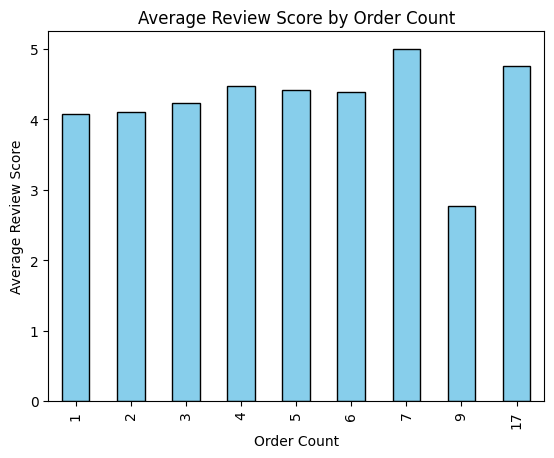

In [113]:
# Group by order_count and calculate the average review score
average_score_by_order_count = merged_data.groupby('order_count')['average_review_score'].mean()

# Print the results
print(average_score_by_order_count)

# Plot the average review score by order count
average_score_by_order_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Order Count')
plt.ylabel('Average Review Score')
plt.title('Average Review Score by Order Count')
plt.show()


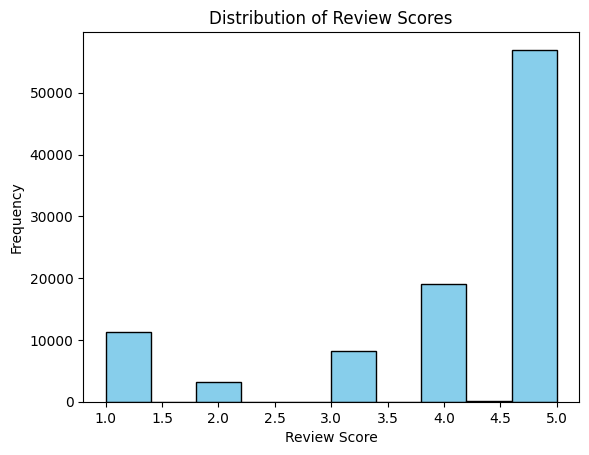

In [114]:
plt.hist(df['average_review_score'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.show()

## Effect of 1 star Review ##

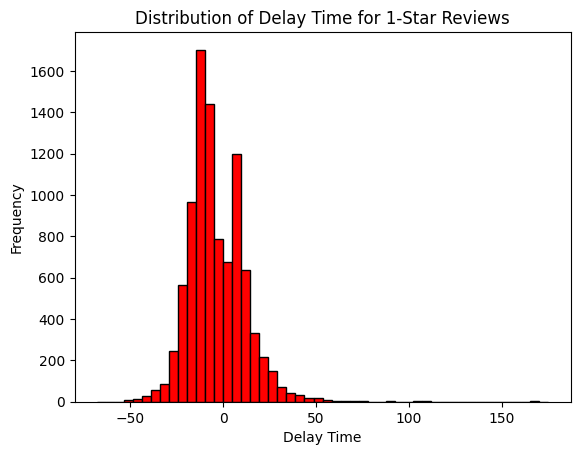

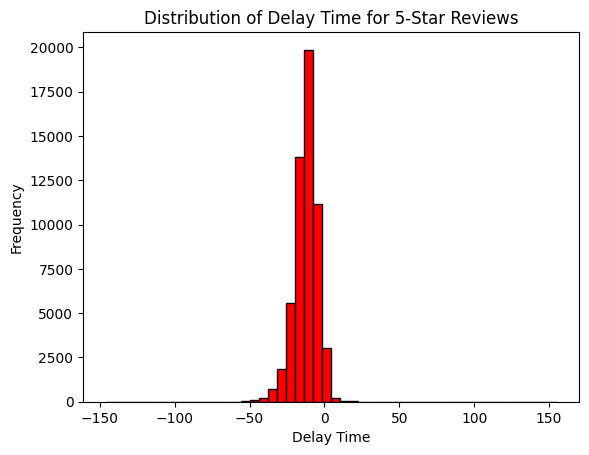

In [127]:
one_stars = df[df['average_review_score']<2]
one_stars.head()

plt.hist(one_stars['delay_time'].dropna(), bins=50, color='red', edgecolor='black')
plt.xlabel('Delay Time')
plt.ylabel('Frequency')
plt.title('Distribution of Delay Time for 1-Star Reviews')
plt.show()

five_stars = df[df['average_review_score']>4]
plt.hist(five_stars['delay_time'].dropna(), bins=50, color='red', edgecolor='black')
plt.xlabel('Delay Time')
plt.ylabel('Frequency')
plt.title('Distribution of Delay Time for 5-Star Reviews')
plt.show()

     delay_time  percentage_one_star
0        -146.0                  0.0
1        -139.0                  0.0
2        -134.0                  0.0
3        -123.0                  0.0
4        -108.0                  0.0
..          ...                  ...
192       166.0                100.0
193       167.0                100.0
194       175.0                100.0
195       181.0                  0.0
196       188.0                  0.0

[197 rows x 2 columns]


/var/folders/vc/ydqs1m4s6w35gmq4jfdzwvxw0000gn/T/ipykernel_1259/657876173.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentage_one_star_by_delay = df.groupby('delay_time').apply(


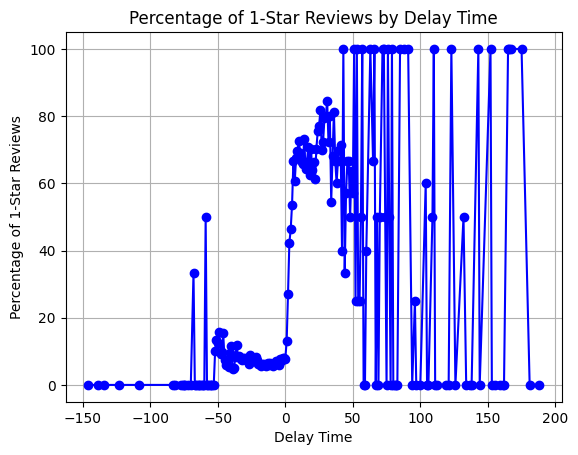

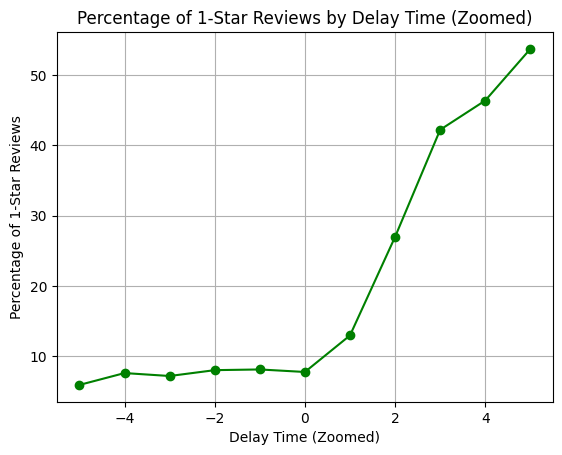

In [128]:
# percentage of 1 star reviews by delay time.
# Group by delay time, then get percentage <2
# Group by delay time and calculate the percentage of reviews with score < 2
percentage_one_star_by_delay = df.groupby('delay_time').apply(
    lambda x: (x['average_review_score'] < 2).mean() * 100
).reset_index(name='percentage_one_star')

print(percentage_one_star_by_delay)
plt.plot(percentage_one_star_by_delay['delay_time'], percentage_one_star_by_delay['percentage_one_star'], marker='o', linestyle='-', color='blue')
plt.xlabel('Delay Time')
plt.ylabel('Percentage of 1-Star Reviews')
plt.title('Percentage of 1-Star Reviews by Delay Time')
plt.grid(True)
plt.show()
# Filter the data for delay_time between -5 and 5
zoomed_data = percentage_one_star_by_delay[
    (percentage_one_star_by_delay['delay_time'] >= -5) & 
    (percentage_one_star_by_delay['delay_time'] <= 5)
]

# Plot the zoomed data
plt.plot(zoomed_data['delay_time'], zoomed_data['percentage_one_star'], marker='o', linestyle='-', color='green')
plt.xlabel('Delay Time (Zoomed)')
plt.ylabel('Percentage of 1-Star Reviews')
plt.title('Percentage of 1-Star Reviews by Delay Time (Zoomed)')
plt.grid(True)
plt.show()

Customers are very unforgiving, at 4 days late, the percentage of 1 star reviews reacheds 50 percent.

In [129]:
#what percentage of people who made a second order when their first order was 1 star.
# Filter the data for first orders with 1-star reviews
first_orders_one_star = df[(df['nth_order'] == 1) & (df['average_review_score'] < 2)]

# Get the customer IDs of those who made a second order after a 1-star review
second_orders_one_star = df[(df['nth_order'] == 2) & (df['customer_unique_id'].isin(first_orders_one_star['customer_unique_id']))]

# Calculate the percentage of customers who made a second order after a 1-star review
percentage_one_star_second_time = (len(second_orders_one_star) / len(first_orders_one_star)) * 100

# Filter the data for first orders with reviews of 2 stars or more
first_orders_non_one_star = df[(df['nth_order'] == 1) & (df['average_review_score'] >= 2)]

# Get the customer IDs of those who made a second order after a non-1-star review
second_orders_non_one_star = df[(df['nth_order'] == 2) & (df['customer_unique_id'].isin(first_orders_non_one_star['customer_unique_id']))]

# Calculate the percentage of customers who made a second order after a non-1-star review
percentage_non_one_star_second_time = (len(second_orders_non_one_star) / len(first_orders_non_one_star)) * 100

print(f"Percentage of customers who made a second order after a 1-star review: {percentage_one_star_second_time:.2f}%")
print(f"Percentage of customers who made a second order after a non-1-star review: {percentage_non_one_star_second_time:.2f}%")


Percentage of customers who made a second order after a 1-star review: 3.05%
Percentage of customers who made a second order after a non-1-star review: 3.12%


Though customers are very unforgiving on reviews, they will purchase again at about the same rate.

At this point, Since the timescale is very short and 95%+ of people only order a single time, it's wiser to stick to a seller or product based analysis, seeing whether sellers with higher reviews earn more money. This should capture the effect of reviews on other customers, not just for the same customer.

TLDR; It is difficult to guess the effect of delivery on customer behavior at an individual level, but we can get their review. And from their review, we can see the effect on overall product performance.

Next, we will test to see if we can use products, by finding out on average how many times a single product is sold. If we can see a good distribution, it is likely that products can have predicitive power.

Delivery Value analysis:

Overall, Reviews do not have an effect on purchases of other customers in this time scale:
This may because the reviews are not published on the website, and customers are not aqcuired through word of mouth,
at least on this time scale.

Overall, whether someone continues purchases again has little to do with their previous experience.
Even after giving a 1 star review, they will re-purchase at around the same rate as people who gave good reviews.

With a larger time scale, effects may compound so it is important not to dismiss this however. We have not seen what happens to more loyal customers (we don't have enough right now at this time scale) when they recieve bad experiences.

One thing is clear though, they don't like it when their products are late, even a little bit.

While we saw that faster deliveries are better always, we don't get 1 star reviews until they are late.